# PlantVillage Dataset
__Structure des données :__ Les images sont organisées en dossiers, chaque dossier représentant une espèce de plante et son "état" (en bonne santé ou type de maladie). Dans le notebook cette notion (plante + état) sera nommée classe.
<br>
__Format des images :__ JPG / jpeg 

## 1. Import des librairies


In [70]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image

## 2. Exploration des données

__Périmètre d'analyse :__ Les répertoires color/greyscaled/segmented contiennent les mêmes répertoires et photos. Seul le traitement de l'image diffère. Par conséquent, l'exploration des données se focalisara sur le répertoire color. 

### 2.1 Analyse des répertoires et des fichiers 

In [71]:
# Chemin du dataset
dataset_path = '../data/raw/plantvillage dataset/color'

# Nom des classes
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Nombre de classes : {len(classes)}")

# Compter les images par classe
image_counts = {classe: len(os.listdir(os.path.join(dataset_path, classe))) for classe in classes}
print("Nombre d'images par classe : ")
display(image_counts)

# Nombre total d'images
print("Nombre total d'images :", sum(image_counts.values()))

Nombre de classes : 38
Nombre d'images par classe : 


{'Strawberry___healthy': 456,
 'Grape___Black_rot': 1180,
 'Potato___Early_blight': 1000,
 'Blueberry___healthy': 1502,
 'Corn_(maize)___healthy': 1162,
 'Tomato___Target_Spot': 1404,
 'Peach___healthy': 360,
 'Potato___Late_blight': 1000,
 'Tomato___Late_blight': 1909,
 'Tomato___Tomato_mosaic_virus': 373,
 'Pepper,_bell___healthy': 1478,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Tomato___Leaf_Mold': 952,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Cherry_(including_sour)___Powdery_mildew': 1052,
 'Apple___Cedar_apple_rust': 275,
 'Tomato___Bacterial_spot': 2127,
 'Grape___healthy': 423,
 'Tomato___Early_blight': 1000,
 'Corn_(maize)___Common_rust_': 1192,
 'Grape___Esca_(Black_Measles)': 1383,
 'Raspberry___healthy': 371,
 'Tomato___healthy': 1591,
 'Cherry_(including_sour)___healthy': 854,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Apple___Apple_scab': 631,
 'Corn_(maize)___Northern_Leaf_Blight': 985,
 'Tomato___Spider_mites Two-spotted_spider_mite': 16

Nombre total d'images : 54306


### 2.2 Analyse des propriétés des images

In [84]:
# Fonction pour extraire les métadonnées EXIF
def get_exif_data(image):
    exif_data = {}
    info = image._getexif()
    if info:
        for tag, value in info.items():
            decoded = TAGS.get(tag, tag)
            exif_data[decoded] = value
    return exif_data

# Obtenir les dimensions des images et les métadonnées EXIF
dimensions = []
all_exif_data = {}

for classe in classes:
    for img_name in os.listdir(os.path.join(dataset_path, classe)):
        img_path = os.path.join(dataset_path, classe, img_name)
        img = Image.open(img_path)
        dimensions.append((classe, img.size))
        exif_data = get_exif_data(img)
        if exif_data:
            all_exif_data[img_path] = exif_data

df_dimensions = pd.DataFrame(dimensions, columns=['Classe', 'Dimensions'])

# Liste des dimensions des images
print('Liste des dimensions des images :')
display(df_dimensions['Dimensions'].value_counts())

print("Toutes les images ont les mêmes dimensions\n")

# Afficher les métadonnées
if all_exif_data:
    for img_path, exif_data in all_exif_data.items():
        print(f"Image: {img_path}")
        for key, value in exif_data.items():
            print(f"{key}: {value}")
        print("\n")
else:
    print("Aucune métadonnée trouvée.")

Liste des dimensions des images :


Dimensions
(256, 256)    54305
Name: count, dtype: int64

Toutes les images ont les mêmes dimensions

Aucune métadonnée trouvée.


### 2.3 Visualisation de la distribution des classes

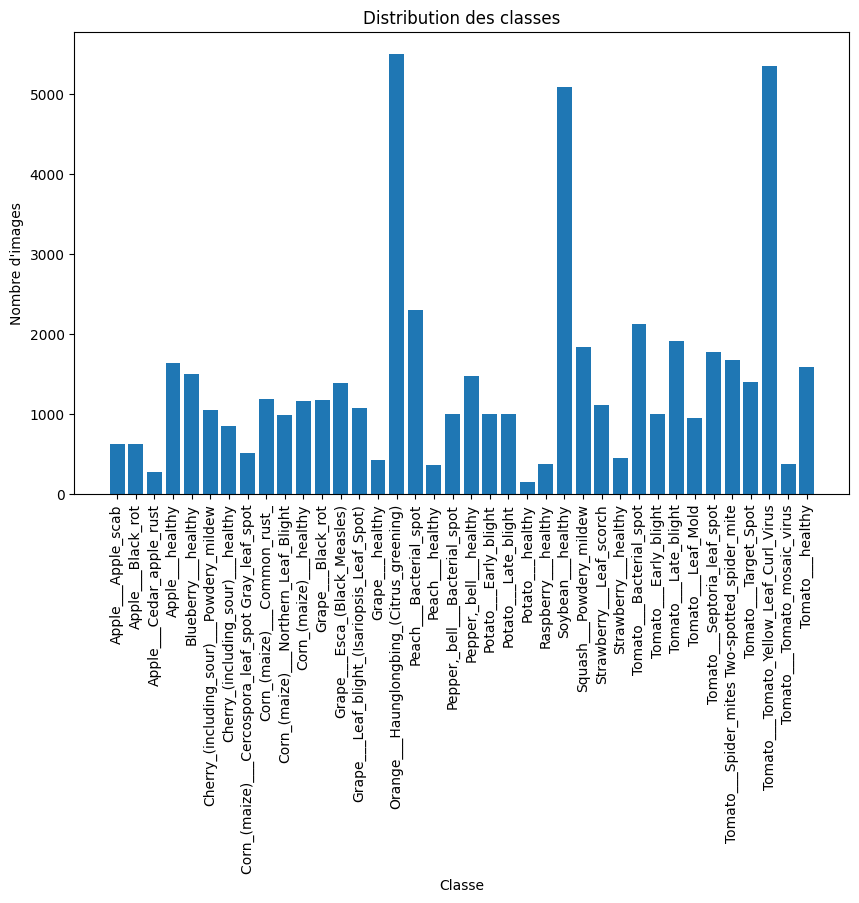

In [78]:
# On trie les classes alphabétiquement
from collections import OrderedDict
image_counts_ordered = OrderedDict(sorted(image_counts.items()))

# Tracer la distribution des classes
plt.figure(figsize=(10, 6))
plt.bar(image_counts_ordered.keys(), image_counts_ordered.values())
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des classes')
plt.xticks(rotation=90)
plt.show()

### 2.4 Visualisation de la distribution des espèces

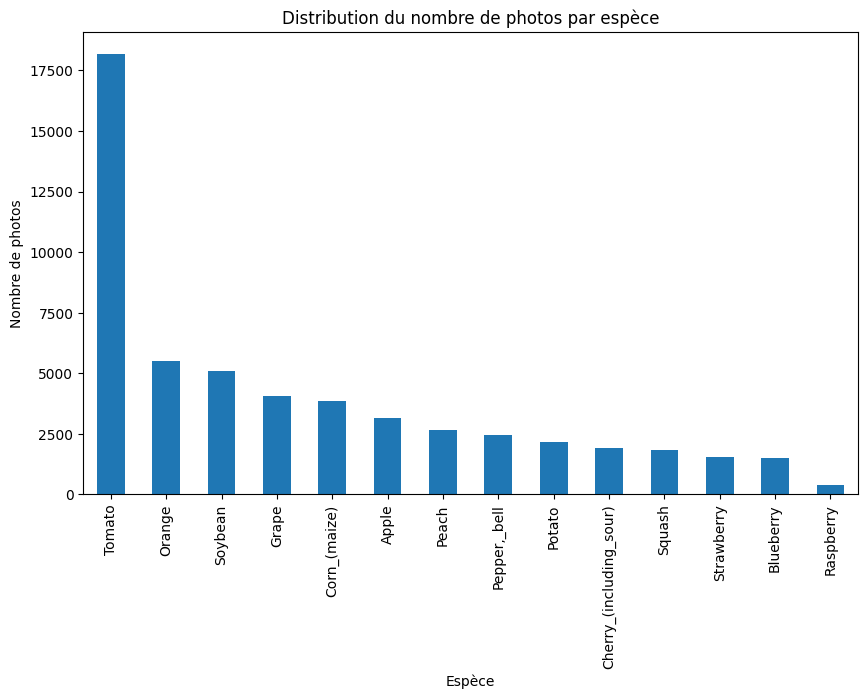

In [79]:
# Initialiser une liste pour stocker les informations
data = []

# Parcourir chaque sous-répertoire dans le répertoire de base et récupérer les informations nécessaires
for directory in os.listdir(dataset_path):
    sub_dir = os.path.join(dataset_path, directory)
    if os.path.isdir(sub_dir):
        # Séparer le nom du répertoire en espece et maladie
        espece, maladie = directory.split('___')
        # Compter le nombre de fichiers dans le sous-répertoire
        count = len(os.listdir(sub_dir))
        # Ajouter les informations à la liste
        data.append([espece, maladie, count])

# Créer un DataFrame à partir de la liste
df = pd.DataFrame(data, columns=['species', 'disease', 'count'])

# Visualisation de la distribution du nombre de photos par espèce
species_counts = df.groupby('species')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar')
plt.title('Distribution du nombre de photos par espèce')
plt.xlabel('Espèce')
plt.ylabel('Nombre de photos')
plt.show()

### 2.5 Visualisation de la relation entre chaque espèce et ses maladies

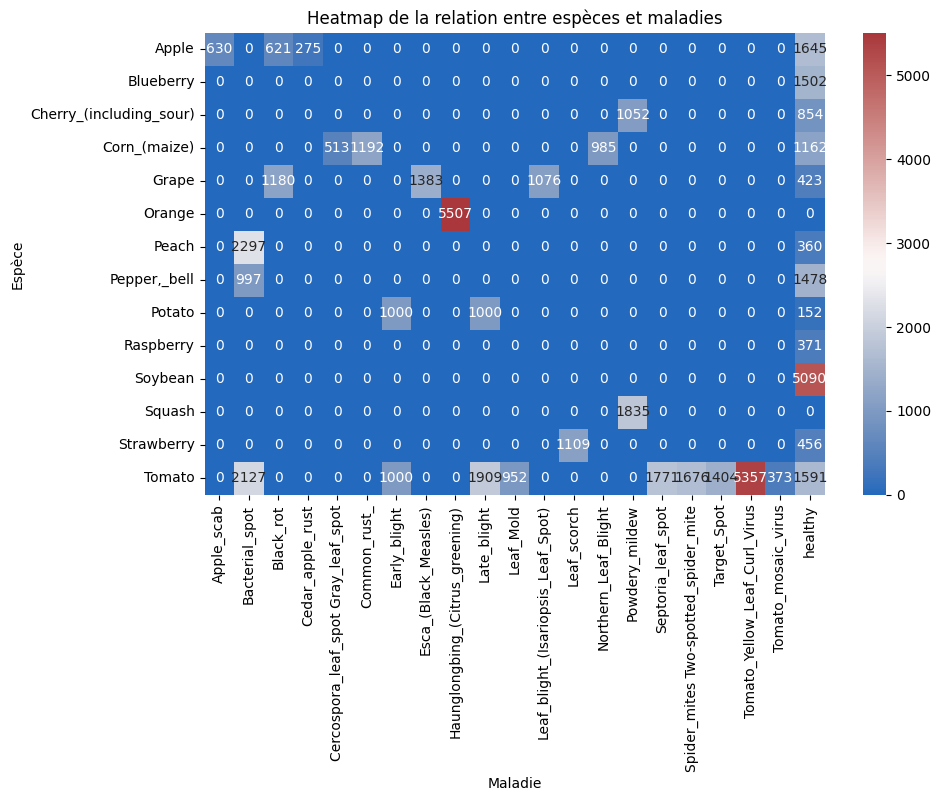

In [80]:
# Création de la table pivot
species_disease_counts = df.pivot_table(index='species', columns='disease', values='count', aggfunc='sum', fill_value=0)

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(species_disease_counts, annot=True, fmt=".0f", cmap="vlag")
plt.title('Heatmap de la relation entre espèces et maladies')
plt.xlabel('Maladie')
plt.ylabel('Espèce')
plt.show()

### 2.6 Visualisation des échantillons

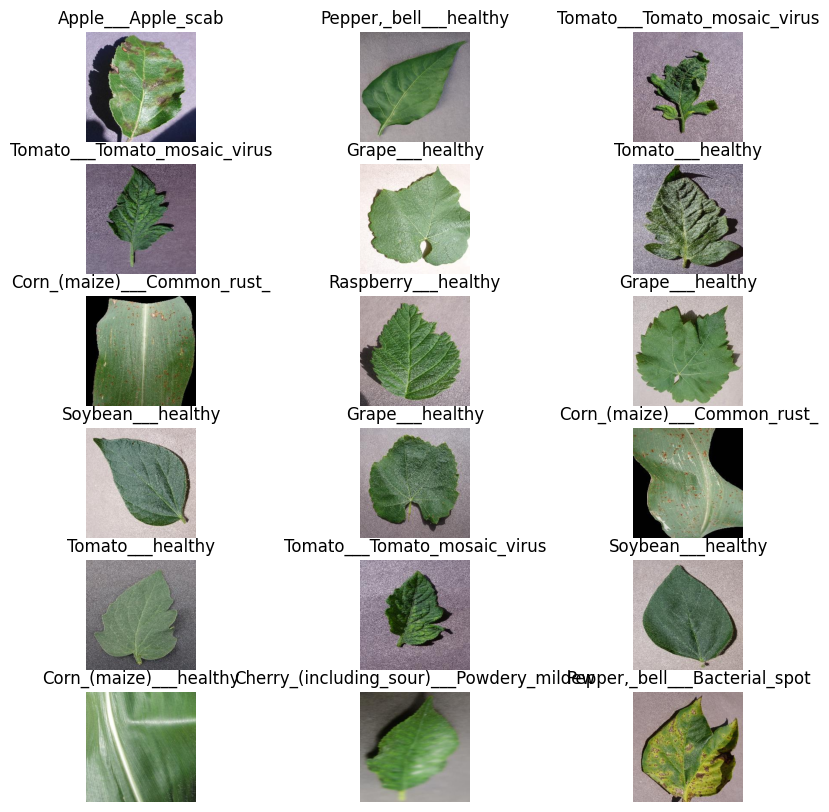

In [81]:
fig, axes = plt.subplots(6, 3, figsize=(10, 10))

for axe in axes.flatten():
    classe = np.random.choice(classes)
    img_name = np.random.choice(os.listdir(os.path.join(dataset_path, classe)))
    img_path = os.path.join(dataset_path, classe, img_name)
    img = Image.open(img_path)
    axe.imshow(img)
    axe.set_title(classe)
    axe.axis('off')
plt.show()